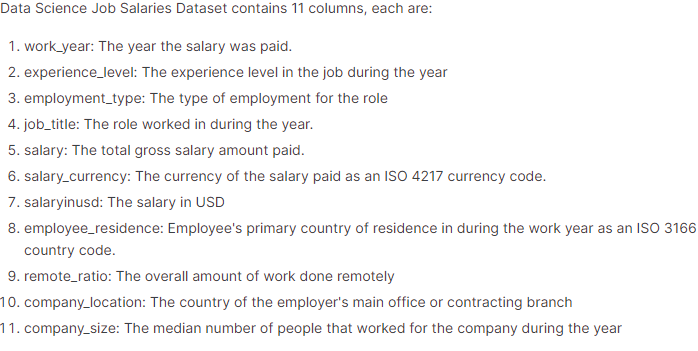

# Labraries

In [74]:
#Importing the labraries

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Analyzing the data 1 

In [75]:
# showing the dataframe
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [76]:
# Informations about dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [77]:
# Information about numerical columns
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [78]:
# Shape of the datas
print("Shape of application data",df.shape)
print("-------------------------------------------")
print("Columns of application data",df.columns)

Shape of application data (3755, 11)
-------------------------------------------
Columns of application data Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [79]:
# Splitting columns by type
cat = []
num = []
for n ,d in df.items():
    if d.dtype == 'object':
        cat.append(n)
    else:
        num.append(n)

print(f'categorical columns : {cat}')
print(f'numerical columns : {num}')

categorical columns : ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
numerical columns : ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


In [80]:
# Checking if dataframe has NA values
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Analyzing the data 2

In [81]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S


- experience_level

SE: Senior-Level

MI: Mid-Level

EN: Entry-Level

EX: Executive-Level

In [82]:
# Mount of experience level
df['experience_level'].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [83]:
# Mount of Job Titles
df['job_title'].value_counts().head(10)

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: job_title, dtype: int64

In [84]:
# Amount of Salaries
df['salary_in_usd'].value_counts().head(10)

100000    99
150000    98
120000    91
160000    84
130000    82
200000    64
140000    63
135000    63
145000    54
175000    51
Name: salary_in_usd, dtype: int64

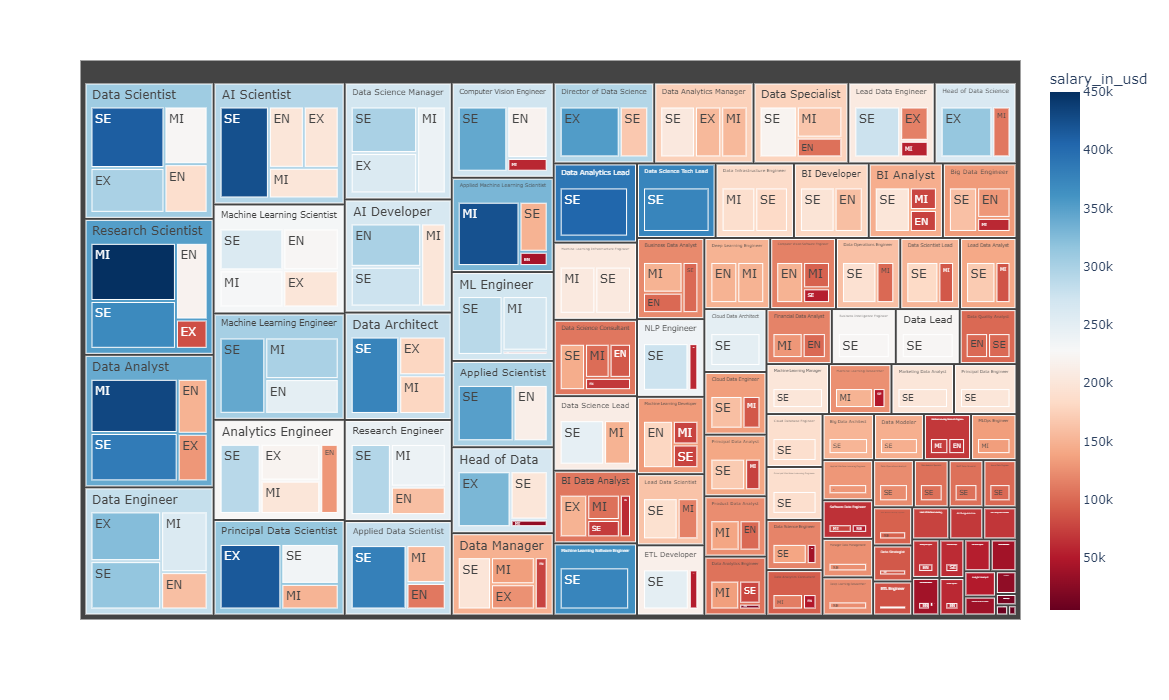

In [85]:
# Plotting the highest salaries by job title and experience
import plotly.express as px
job = df.groupby(['job_title','experience_level']).max()['salary_in_usd']
job = job.reset_index()
fig = px.treemap(job, path=['job_title','experience_level'], values='salary_in_usd', color = 'salary_in_usd', color_continuous_scale='RdBu')
fig.update_layout(width = 1200,
                 height = 700)
fig.show()

In [86]:
# Exploring all the columns
for i in df.columns:
    print(f'{i} : {len(df[i].unique())}')
    print('------------------------------')
    print(df[i].value_counts()[:10])
    print('\n')

work_year : 4
------------------------------
2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64


experience_level : 4
------------------------------
SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64


employment_type : 4
------------------------------
FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64


job_title : 93
------------------------------
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: job_title, dtype: int64


salary : 815
------------------------------
100000    112
150000    100
120000     99
160000     85
130000     85
200000     65
140000     64
135000     63
80000      58
145000     54
N

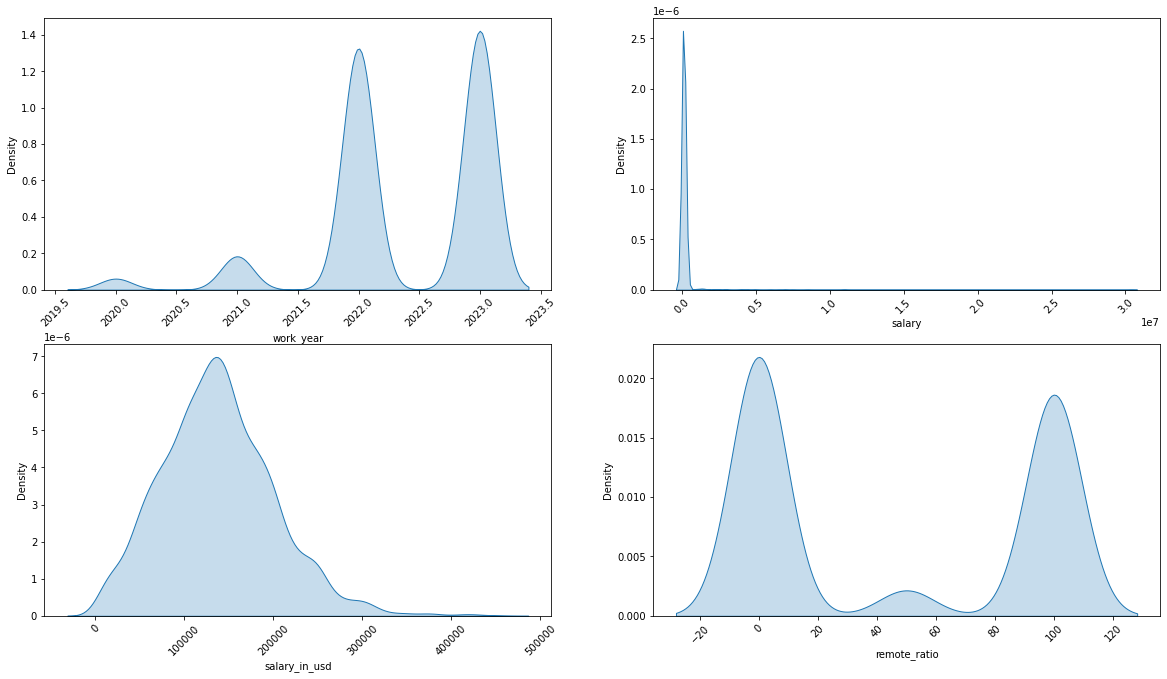

In [87]:
# Creating density plots for numeric columns

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,11))
for i in range(len(num)):
    plt.subplot(2,2,i+1)
    plt.xticks(rotation = 45)
    sns.kdeplot(data = df, x=num[i], fill=True);

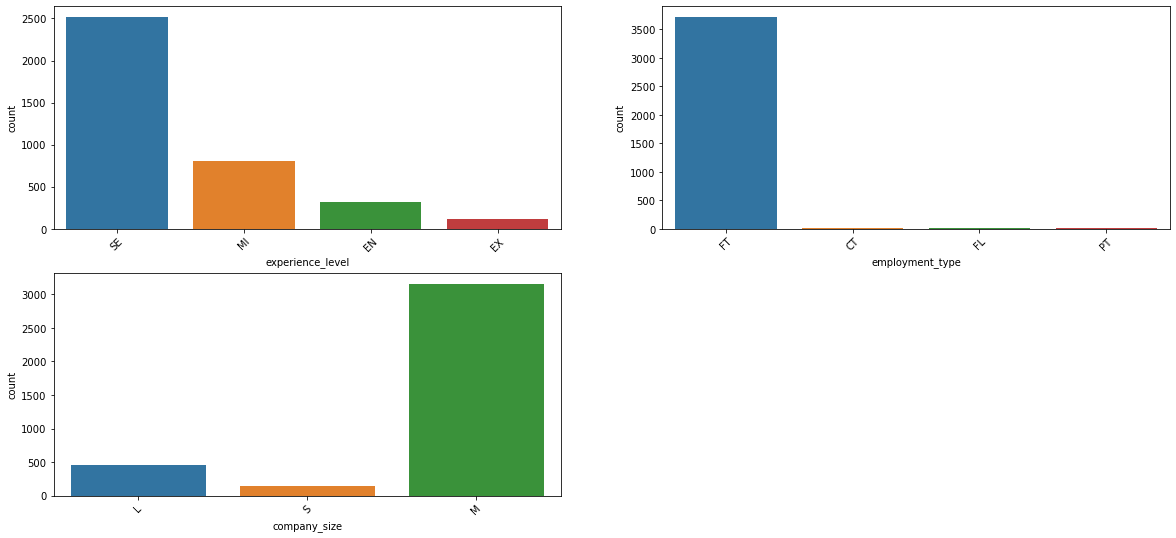

In [88]:
# Plotting for categorical columns
catf = ['experience_level', 'employment_type', 'company_size']
plt.figure(figsize=(20, 9))
for i in range(len(catf)):
    plt.subplot(2, 2, i + 1)
    plt.xticks(rotation=45)
    sns.countplot(df[catf[i]], fill=True)

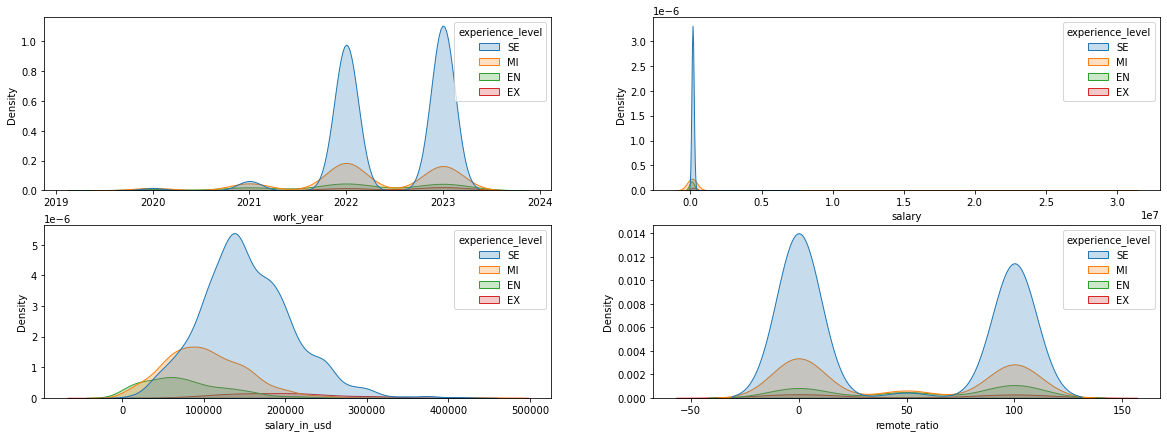

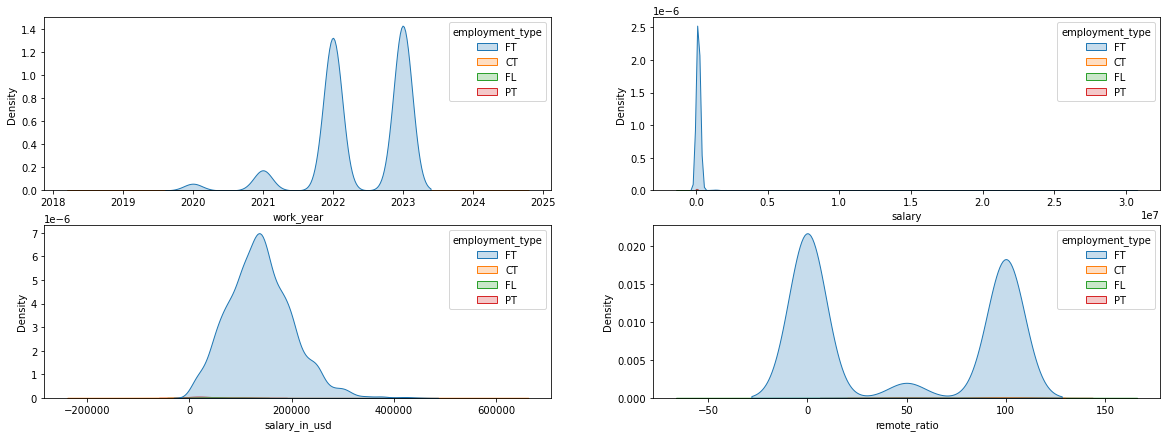

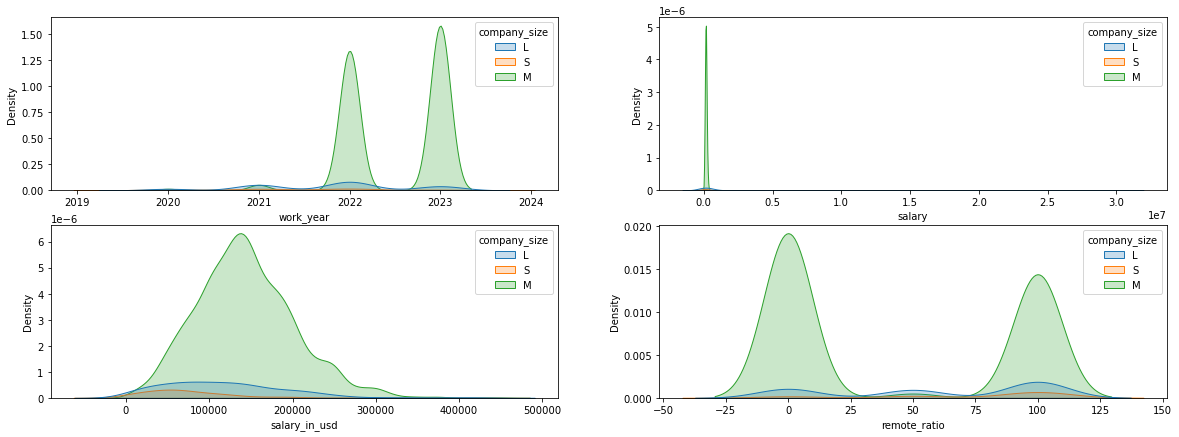

In [89]:
# Creating density plots for numerical columns versus categorical columns

for j in catf:
    plt.figure(figsize=(20, 7))
    for i in range(len(num)):
        plt.subplot(2, 2, i + 1)
        sns.kdeplot(data=df, x=num[i], fill=True, hue = j);

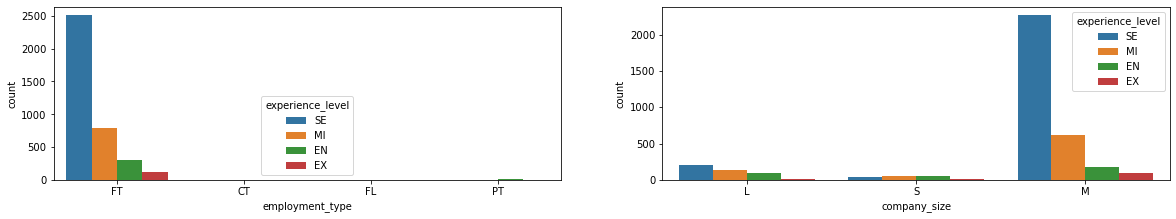

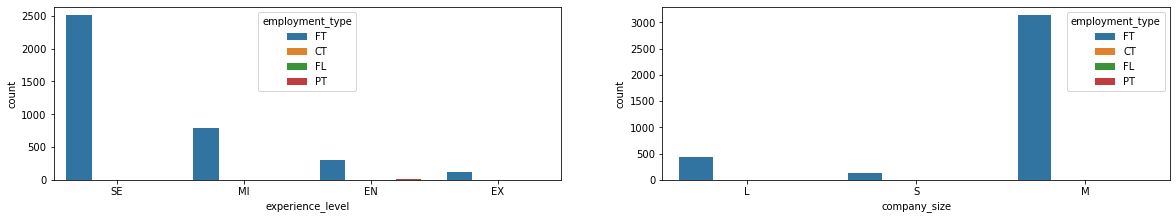

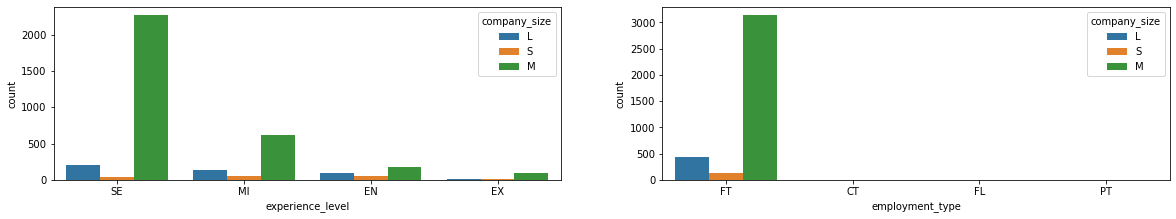

In [90]:
# Plotting for categorical columns vs categorical columns 

for j in catf:
    catg = ['experience_level', 'employment_type', 'company_size']
    catg.remove(j)
    
    plt.figure(figsize=(20, 7))
    for i in range(len(catg)):
        plt.subplot(2, 2, i + 1)
        sns.countplot(data=df, x=catg[i], hue=j, fill=True)

In [91]:
catg =  ['experience_level', 'employment_type', 'company_size']
catg.remove('experience_level')
catg

['employment_type', 'company_size']

In [92]:
# In summary, the code performs encoding of categorical variables using LabelEncoder and standardization of numerical variables using StandardScaler.
#These transformations are commonly used to prepare data before training a machine learning model, helping to ensure that the data is in a suitable format for analysis.

dfx = df.copy()
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Transform Categorical columns
le = LabelEncoder()

for i in cat:
    dfx[i] = le.fit_transform(dfx[i]) 

# Transform numerical columns
ss = StandardScaler()

for i in num:
    dfx[i] = ss.fit_transform(dfx[[i]]) # replacing numerical values with standardized values.

dfx.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0.905994,3,2,84,-0.164827,7,-0.820391,26,1.105918,25,0
1,0.905994,2,0,66,-0.239277,19,-1.706187,75,1.105918,70,2
2,0.905994,2,0,66,-0.245978,19,-1.777563,75,1.105918,70,2
3,0.905994,3,2,47,-0.023371,19,0.593676,11,1.105918,12,1
4,0.905994,3,2,47,-0.105266,19,-0.278686,11,1.105918,12,1


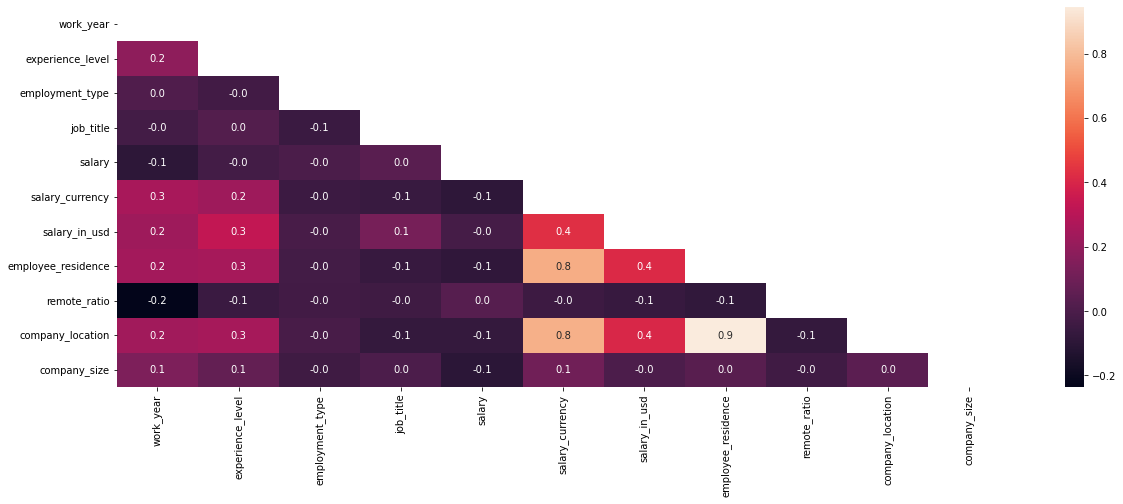

In [93]:
# checking the correlation between the data.

corr= dfx.corr()
matrix = np.triu(corr)
plt.figure(figsize = (20,7))
sns.heatmap(corr, annot=True, mask=matrix, fmt = ".1f");